# Methods & Results

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Our analysis starts by importing the dataset directly from the data folder.

In [3]:
players_tidy <- players_data |>
  select (experience, subscribe, played_hours, Age) |>
  filter (Age != 17) |>
  mutate (experience = as_factor(experience),
        subscribe = as_factor(subscribe))
head(players_tidy)
players_tidy <- players_tidy %>%
  mutate(subscribe = fct_relevel(subscribe, "TRUE")) #This simply makes TRUE in subscribe column the positive class

experience,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Amateur,TRUE,0.7,21
Regular,TRUE,0.1,21
Regular,TRUE,0.0,19
Amateur,FALSE,0.0,21
Veteran,TRUE,0.0,22


After loading, we clean the dataset to include only the relevant variables: experience, subscribe, played_hours, and Age. These variables are chosen because they relate closely to user behavior and potential factors influencing subscription decisions. Players aged exactly 17 are removed, because they form an unrepresentative group that could introduce noise. Converting experience and subscribe to categorical types ensures that these variables are treated correctly during modeling, especially since subscribe is the outcome we aim to predict.

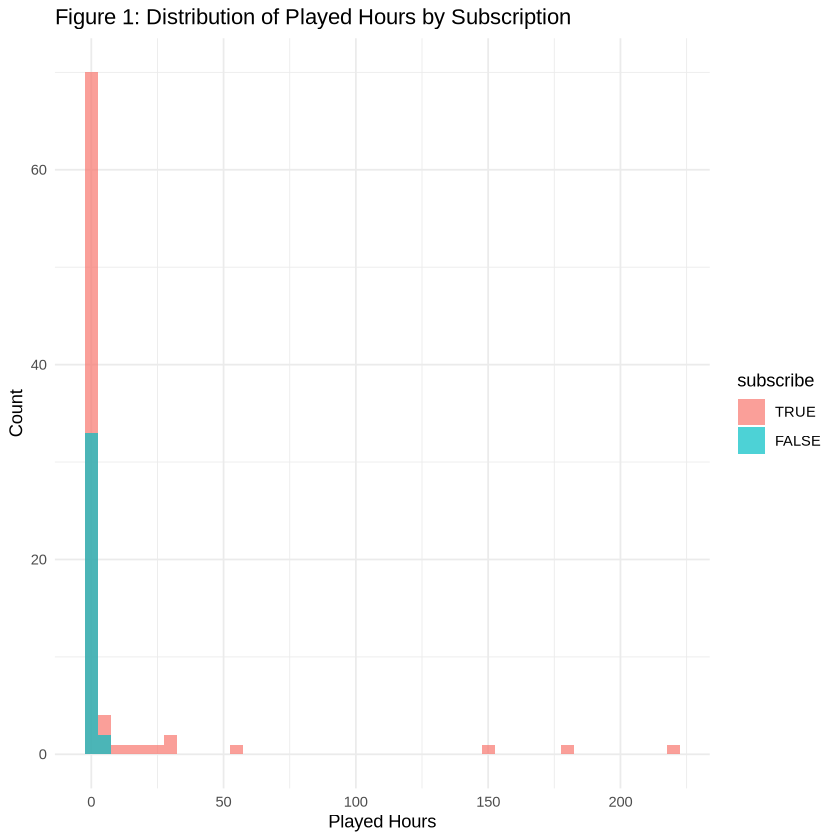

In [4]:
p1 <- players_tidy |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(binwidth = 5, alpha = 0.7, position = "identity") +
  labs(title = "Figure 1: Distribution of Played Hours by Subscription",
       x = "Played Hours", y = "Count") +
  theme_minimal()
p1

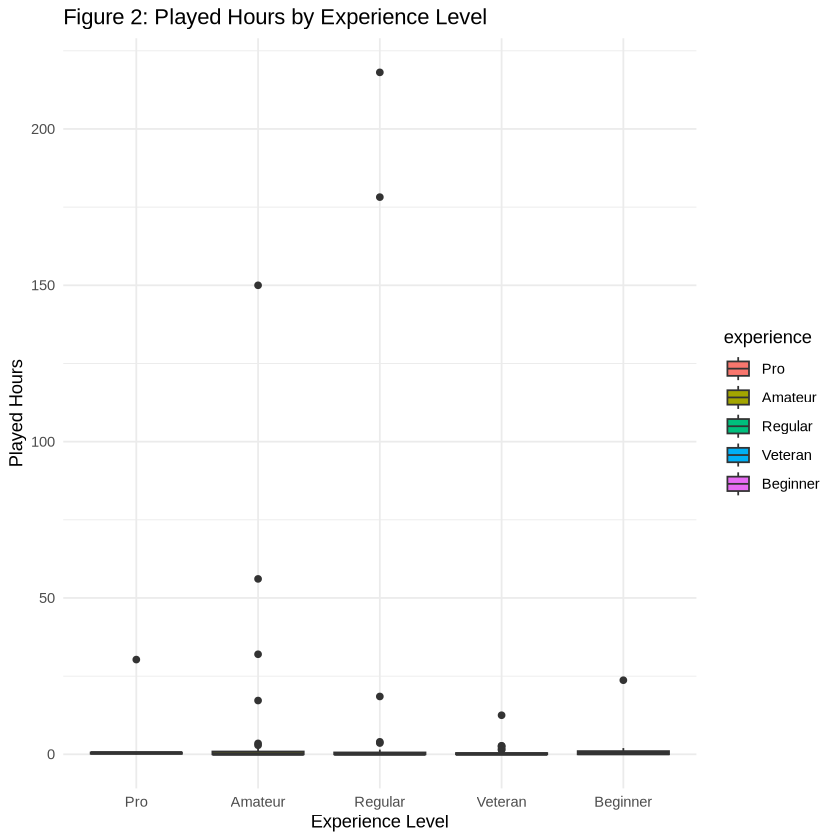

In [5]:
p2 <- players_tidy |>
  ggplot(aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot() +
  labs(title = "Figure 2: Played Hours by Experience Level",
       x = "Experience Level", y = "Played Hours") +
  theme_minimal()
p2

The next step involves visual exploration of the data. A histogram is created to compare how playtime is distributed across subscription statuses. This visualization provides an intuitive way to assess whether more engaged users tend to subscribe and whether there is a pattern that could inform predictions. The bin width is chosen to balance granularity and clarity. A second plot—a boxplot—illustrates how playtime differs across experience levels. This helps us explore whether experience is related to the amount of time spent playing, which might be another indicator of subscription behavior. Both visualizations serve to uncover possible relationships among the variables and the target, guiding feature selection and model expectations.

In [6]:
set.seed(1234)
data_split <- initial_split(players_tidy, prop = 0.8, strata = subscribe)
train_data <- training(data_split)
test_data <- testing(data_split)

The dataset is then split into training and testing sets with an 80/20 ratio. This ensures enough data is available for training while reserving a portion for final model evaluation. Stratifying by the outcome variable ensures that both subsets have similar class distributions, which is critical for classification tasks to avoid biased or misleading results.

In [7]:
knn_recipe <- recipe(subscribe ~ played_hours + Age + experience, data = train_data) |>
  step_normalize(all_numeric_predictors()) |>
  step_dummy(all_nominal_predictors())

We then create a preprocessing recipe . Normalizing numeric variables is essential because the model we’re using is sensitive to scale—larger-scale features could dominate smaller ones and distort the distance calculations. Dummy encoding is applied to the experience variable, allowing the categorical levels to be represented in a way the model can interpret and process effectively. This preprocessing ensures the model receives clean, consistent input without hidden biases from scaling or encoding mismatches.

In [8]:
knn_spec <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("classification")

Next, we specify the k-nearest neighbors classification model, allowing the number of neighbors (k) to be tuned. This setup is chosen because k-NN is intuitive and well-suited for problems where similarity in feature space corresponds to similar outcomes. Setting the number of neighbors as a parameter to be tuned because model performance is highly dependent on this value—too small, and the model overfits; too large, and it may underfit or smooth out important distinctions. Therefore we want to test out different k to determine which works the best.

In [9]:
knn_workflow <- workflow() |>
  add_model(knn_spec) |>
  add_recipe(knn_recipe)

We combine the preprocessing and model definition into a single workflow. 

In [10]:
set.seed(123)
folds <- vfold_cv(train_data, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

To find the optimal number of neighbors, we conduct 10-fold cross-validation. This method offers a robust way to evaluate the model’s performance across various partitions of the training data. It mitigates the effects of random variation from any single train-test split and produces more stable estimates of model performance. We evaluate a range of values for k, from 1 to 20, to identify the configuration that results in the highest classification accuracy.

In [11]:
knn_tune_results <- knn_workflow |>
    tune_grid(resamples = folds, grid = k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_tune_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5995906,5,0.039590643,Preprocessor1_Model01
2,accuracy,binary,0.5995906,5,0.039590643,Preprocessor1_Model02
3,accuracy,binary,0.6112865,5,0.041165977,Preprocessor1_Model03
4,accuracy,binary,0.6223977,5,0.034638647,Preprocessor1_Model04
5,accuracy,binary,0.6640351,5,0.047846122,Preprocessor1_Model05
6,accuracy,binary,0.6740351,5,0.039611563,Preprocessor1_Model06
7,accuracy,binary,0.6951462,5,0.027698811,Preprocessor1_Model07
8,accuracy,binary,0.7162573,5,0.017354386,Preprocessor1_Model08
9,accuracy,binary,0.7062573,5,0.015246681,Preprocessor1_Model09


In [12]:
best_k <- knn_tune_results |>
  arrange(-mean) |>
    slice(1) |>
    pull(neighbors)
best_k

[1] 13

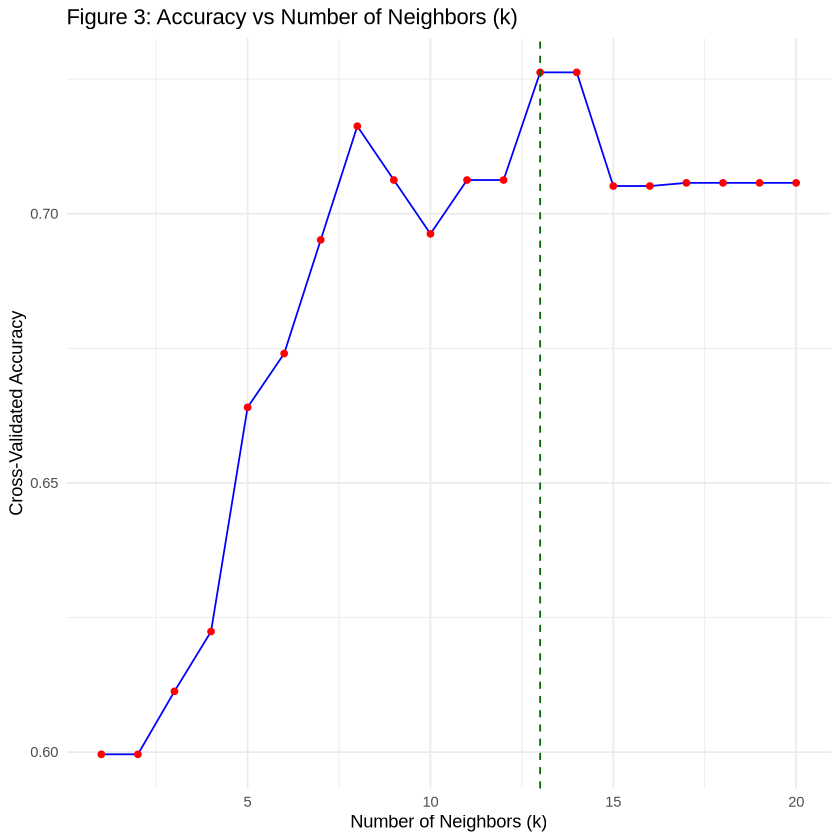

In [13]:
knn_plot <- knn_tune_results |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  geom_vline(xintercept = best_k, linetype = "dashed", color = "darkgreen") +
  labs(title = "Figure 3: Accuracy vs Number of Neighbors (k)",
       x = "Number of Neighbors (k)",
       y = "Cross-Validated Accuracy") +
  theme_minimal()
knn_plot

The model is tuned across the grid of k values, and the one yielding the best accuracy across all folds is selected, which turns out to be 15. This process helps identify a balance between model flexibility and stability. Visualizing the tuning results as a line plot makes it easy to interpret how accuracy changes with the number of neighbors. The plot reveals whether performance improves or plateaus and helps justify the selection of the best k.

In [16]:
final_knn_spec <- nearest_neighbor(neighbors = best_k, weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("classification")

final_knn_workflow <- workflow() |>
  add_model(final_knn_spec) |>
  add_recipe(knn_recipe)

final_fit <- fit(final_knn_workflow, data = train_data)

test_accuracy <- predict(final_fit, test_data) |>
  bind_cols(test_data) |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

test_precision <- predict(final_fit, test_data) |>
  bind_cols(test_data) |>
  precision(truth = subscribe, estimate = .pred_class)

test_recall <- predict(final_fit, test_data) |>
  bind_cols(test_data) |>
  recall(truth = subscribe, estimate = .pred_class)

test_accuracy

test_precision

test_recall

confusion_matrix <- predict(final_fit, test_data) |>
  bind_cols(test_data) |>
  conf_mat(truth = subscribe, estimate = .pred_class)

confusion_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7619048


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9411765


          Truth
Prediction TRUE FALSE
     TRUE    16     5
     FALSE    1     2

With the optimal value chosen, the workflow is finalized and retrained on the full training dataset. This ensures that the model benefits from all available training data before making final predictions. The model is then applied to the test set, providing an unbiased evaluation of its real-world performance. The results include  overall accuracy, precision, recall and a confusion matrix, offering insight into how well the model predicts each class and where it might make mistakes. This final step validates the effectiveness of the model and helps us understand its strengths and limitations in a practical context.